### Problem One: Select features and categories for practice



In [29]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)


iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [30]:
import pandas as pd

# extract the data
iris_data = iris["data"]


# rename the columns of iris_data for easy access
iris_data.columns = ["_".join(col.split(" ")[:2]) for col in iris_data.columns]

# make a slice of the data comprising of sepal_length and petal_length only and concatenate it with the target data
df = pd.concat([iris_data[["sepal_length", "petal_length"]], iris["target"]], axis=1)

# query the dataframe for versicolor and virginica (targets 1 and 2 respectively)
df = df.query("target == 1 or target == 2").reset_index(drop=True)
df

,sepal_length,petal_length,target
0,7.0,4.7,1
1,6.4,4.5,1
2,6.9,4.9,1
3,5.5,4.0,1
4,6.5,4.6,1
...,...,...,...
95,6.7,5.2,2
96,6.3,5.0,2
97,6.5,5.2,2
98,6.2,5.4,2


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

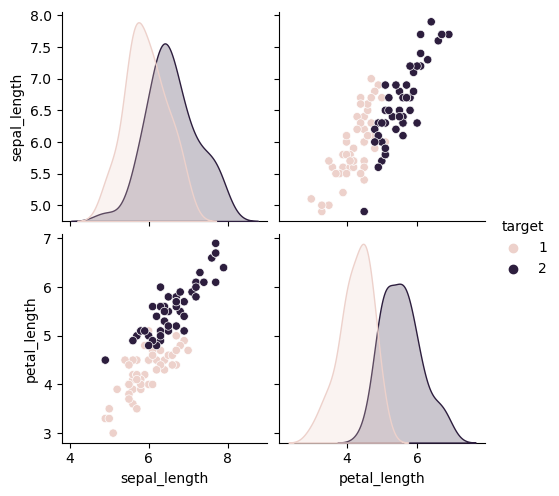

In [4]:
sns.pairplot(df, hue="target")

### Problem Two: Data analysis

In [5]:
df.head()

,sepal_length,petal_length,target
0,7.0,4.7,1
1,6.4,4.5,1
2,6.9,4.9,1
3,5.5,4.0,1
4,6.5,4.6,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   petal_length  100 non-null    float64
 2   target        100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [7]:
df.describe()

,sepal_length,petal_length,target
count,100.000000,100.000000,100.000000
mean,6.262000,4.906000,1.500000
std,0.662834,0.825578,0.502519
min,4.900000,3.000000,1.000000
25%,5.800000,4.375000,1.000000
50%,6.300000,4.900000,1.500000
75%,6.700000,5.525000,2.000000
max,7.900000,6.900000,2.000000


In [8]:
for specie in df.target.unique():
    num_samples = sum(df["target"] == specie)
    print(f"The total number of samples for specie {specie}: {num_samples}")

The total number of samples for specie 1: 50
The total number of samples for specie 2: 50


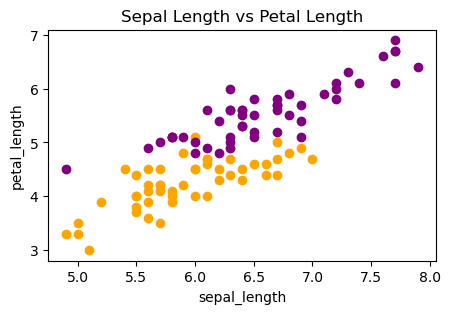

In [9]:
# show a scatter plot of the extracted data
%matplotlib inline

plt.figure(figsize=(5,3))
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.title("Sepal Length vs Petal Length")
plt.scatter(df[df["target"]==1]["sepal_length"], df[df["target"]==1]["petal_length"], c="orange")

plt.scatter(df[df["target"]==2]["sepal_length"], df[df["target"]==2]["petal_length"], c="purple")
plt.show()

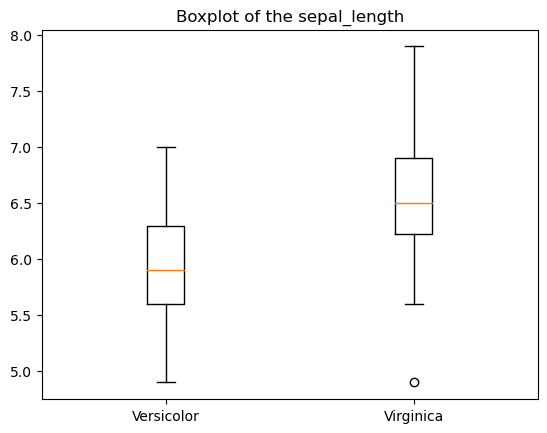

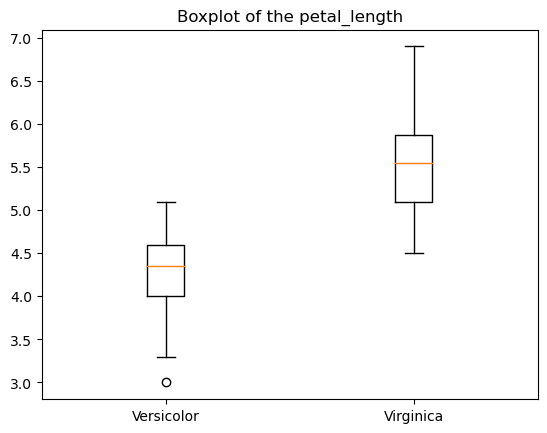

In [10]:
# show a box plot of the extracted data


for feature in df.columns[:-1]:
    versicolor = df[df["target"]==1][feature]
    virginica = df[df["target"]==2][feature]
    
    
    plt.boxplot([versicolor, virginica])
    plt.title(f"Boxplot of the {feature}")
    plt.xticks([1,2], ["Versicolor", "Virginica"])
    plt.show()

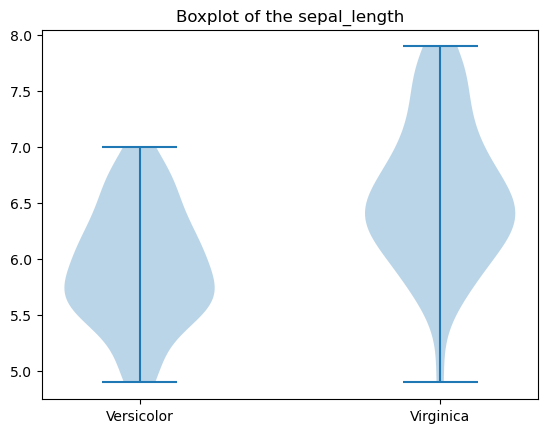

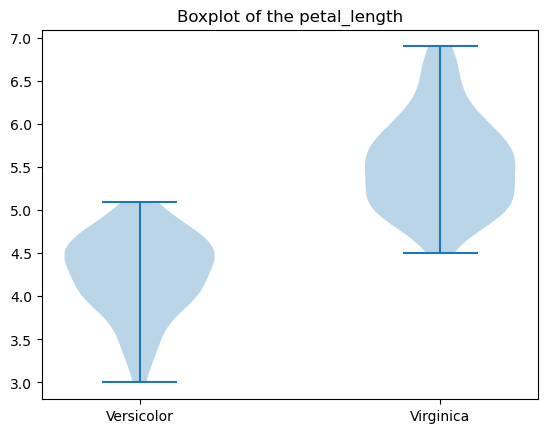

In [11]:
# show a violin plot of the extracted data


for feature in df.columns[:-1]:
    versicolor = df[df["target"]==1][feature]
    virginica = df[df["target"]==2][feature]
    
    
    plt.violinplot([versicolor, virginica])
    plt.title(f"Boxplot of the {feature}")
    plt.xticks([1,2], ["Versicolor", "Virginica"])
    plt.show()

### Problem Three: Division of preprocessing/training data and verification data

In [31]:
X = df[["sepal_length", "petal_length"]].to_numpy()
y = df["target"]

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Problem  Four: Pretreatment/Standardization

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [34]:
# Learn mean and standard deviation from training data
scaler.fit(X_train)

# Apply scaling to training data
X_train_transformed = scaler.transform(X_train)

# Apply the same scaling to test data
X_test_transformed = scaler.transform(X_test)

### Problem Five: Learning and estimation

In [35]:
from warnings import simplefilter
from sklearn.neighbors import KNeighborsClassifier



simplefilter(action='ignore', category=FutureWarning)


knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train_transformed, y_train)
pred5 = knn5.predict(X_test_transformed)

knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train_transformed, y_train)
pred1 = knn1.predict(X_test_transformed)

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_transformed, y_train)
pred3 = knn3.predict(X_test_transformed)


print(pred5)
print(pred1)
print(pred3)


[1 2 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1 2 2 1 1 2 2 1 2]
[1 2 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1 2 2 1 1 2 2 1 2]
[1 2 2 1 1 1 1 2 1 1 1 2 1 1 2 2 1 2 2 1 1 2 2 1 2]


### Problem Six: Evaluation

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

predictions = {"knn5": pred5, "knn1": pred1, "knn3": pred3}

for key in predictions:
    print(f"Prediction Metrics for {key}")
    
    print("Accuracy: ", accuracy_score(y_true=y_test, y_pred=predictions[key]) * 100)
    print("Precision: ", precision_score(y_true=y_test, y_pred=predictions[key], average=None))
    print("Recall: ", recall_score(y_true=y_test, y_pred=predictions[key], average=None))
    print("F1: ", f1_score(y_true=y_test, y_pred=predictions[key], average=None))
    print("Confusion Matrix: ", confusion_matrix(y_true=y_test, y_pred=predictions[key]))

Prediction Metrics for knn5
Accuracy:  92.0
Precision:  [0.93333333 0.9       ]
Recall:  [0.93333333 0.9       ]
F1:  [0.93333333 0.9       ]
Confusion Matrix:  [[14  1]
 [ 1  9]]
Prediction Metrics for knn1
Accuracy:  92.0
Precision:  [0.93333333 0.9       ]
Recall:  [0.93333333 0.9       ]
F1:  [0.93333333 0.9       ]
Confusion Matrix:  [[14  1]
 [ 1  9]]
Prediction Metrics for knn3
Accuracy:  88.0
Precision:  [0.92857143 0.81818182]
Recall:  [0.86666667 0.9       ]
F1:  [0.89655172 0.85714286]
Confusion Matrix:  [[13  2]
 [ 1  9]]


### Summary on the Metrics

Accuracy: 

### Problem Seven: Visualization

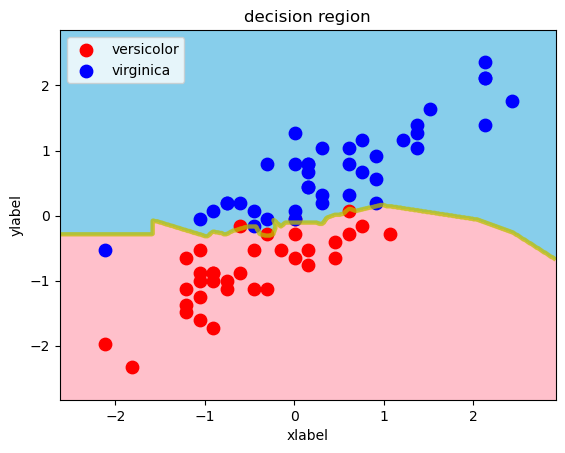

In [38]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import numpy as np

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    

decision_region(X_train_transformed, y_train, knn3)

### Problem Eight: Learning by other methods

### Problem Nine: (Advanced task) Comparison with and without standardization

### Problem Ten: (Advance assignment) Highly accurate method using all objective variables